In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# For unit testing answers.
from unittest.mock import patch, Mock

# Reading the data

In [3]:
df = pd.read_excel(r'C:\Users\noshi\OneDrive\Desktop\Computer Science\Computer Science 2020-2021\Data visualisation and the web\Project\Noshin Begum Data Visualisations and The Web Project\Code\Data-tables-disease-deaths.xlsx', sheet_name='Deaths')

# Show both the head and tail of the dataset.
df

,"Updated Table A2.3. Deaths attributable to the environment, by WHO region and income status, 2016§",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,World,World,Africa,Americas,NaN,Eastern Mediterranean,NaN,Europe,NaN,South-East Asia,Western Pacific,NaN
1,NaN,Total \n(all ages),\n0-4 years,All,HIC,LMIC,HIC,LMIC,HIC,LMIC,All,HIC,LMIC
2,Population,7430261888,673904396,1019920205,382020167,610136393,54017611,610317786,499400125,416914475,1947631149,213384103,1676519874
3,Total deaths,56188823,5599415,8715561,3162224,3603281,155238,3934487,4830599,4317888,13754870,1794181,11920494
4,Total environmental deaths,13668365,1573296,2534165,421463,684808,37812,945743,696167,659833,4068942,268195,3349445
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,WHO regional groupings: World Health Sta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,"see ""Country grouping"" worksheet of this...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,# Malnutrition and consequences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,HIC: High-income countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Reading data- specific fields

In [4]:
# Read specific columns
df = pd.read_excel(r'C:\Users\noshi\OneDrive\Desktop\Computer Science\Computer Science 2020-2021\Data visualisation and the web\Project\Noshin Begum Data Visualisations and The Web Project\Code\Data-tables-disease-deaths.xlsx', sheet_name='Deaths', index_col = 0, usecols = [0, 8, 10], skiprows = [0])

# Get the specific rows on the diseases I am comparing
select_rows = df.iloc[[1, 2, 3, 7, 9, 12, 24, 31, 32, 58, 62, 63]]

select_rows

,Europe,South-East Asia
Population,499400125,1947631149
Total deaths,4830599,13754870
Total environmental deaths,696167,4068942
Lower respiratory infections,41849,443276
Diarrhoeal diseases,1210.79,295070
Malaria,0,21148
Tuberculosis,683.498,123686
"Trachea, bronchus, lung cancers",110544,96016
Other cancers*,144055,182387
Stroke,46356.6,392720


# Clean data

In [5]:
# How many rows and columns
select_rows.shape

(12, 2)

In [6]:
# Changing data type to int
select_rows['Europe'] = select_rows['Europe'].astype(int)

In [7]:
# Changing data type to int
select_rows['South-East Asia'] = select_rows['South-East Asia'].astype(int)

In [8]:
# Checking data types
select_rows.dtypes

Europe             int32
South-East Asia    int32
dtype: object

In [9]:
# Checking for missing data
select_rows.isnull().sum()

Europe             0
South-East Asia    0
dtype: int64

In [10]:
# Checking for duplicated data
select_rows.duplicated().sum()

0

# Data Manipulations

In [11]:
# Differences between number of deaths associated with the disease in South-East Asia vs Europe
difference = (select_rows['South-East Asia'] - select_rows['Europe'])
difference

Population                         1448231024
Total deaths                          8924271
Total environmental deaths            3372775
Lower respiratory infections           401428
Diarrhoeal diseases                    293860
Malaria                                 21148
Tuberculosis                           123003
Trachea, bronchus, lung cancers        -14527
Other cancers*                          38332
Stroke                                 346364
Asthma                                 103697
Other respiratory diseases                444
dtype: int32

In [12]:
# select_rows['Europe_Population'] = select_rows['Europe'] == 499400125
# select_rows['SEA_Population'] = select_rows['South-East Asia'] == 1947631149

In [13]:
select_rows.head(1)

,Europe,South-East Asia
Population,499400125,1947631149


# Data Visualisations

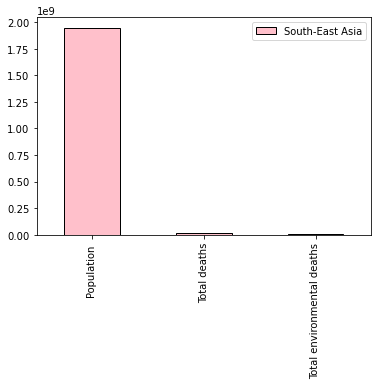

In [14]:
# Plot South-East Asia population, total deaths, total environmental deaths
select_rows.iloc[0:3].plot.bar(y='South-East Asia', color='pink', edgecolor='black')

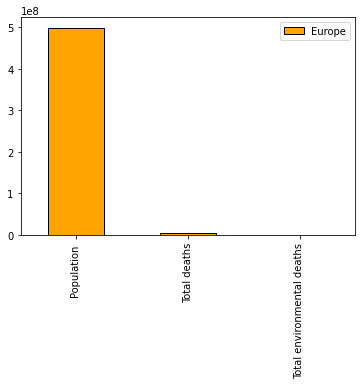

In [16]:
# Plot Europe population, total deaths, total environmental deaths
df.iloc[1:4].plot.bar(y='Europe', color='orange', edgecolor='black')